### Group Members
Rabina Twayana and Omowonuola Molayosi Akintola

# Project: Modeling Earthquake Damage



## 1. Dataset Description


The data was collected during the post-earthquake field surveys conducted by the Nepal National Planning Commission and partners following the 2015 Gorkha earthquake. Trained enumerators visited the affected areas and collected information on the level of damage, structural characteristics (foundation, roof, building materials), household information, age, location information, and building use for over 250,000 buildings. The damage level for buildings is categorized from low damage to almost complete destruction.


The data was gotten from [drivendata](https://www.drivendata.org/competitions/57/nepal-earthquake/page/136/) as part of the Earthquake Modeling Damage Competition. The totality of the data is available through the [Nepal Earthquake Open Data Portal](http://eq2015.npc.gov.np/#/).

Originally, the data was provided in three seperate files:
 - train_values
 - train_labels
 - test_values 
 
 The train_value files contains the feature describing each building, while train_labels provide the corresponding target variable, damage_grade, which indicates the level of structural damage.
For this project, the train_values and the train_labels datasets were merged using the unique building identifier to form a single training dataset. The test_values file were not used since the target labels for it were not provided.

**Why the data was collected**

Although the primary goal of the survey was to identify beneficiaries eligible for government assistance for housing reconstruction, it also collected other useful socio-economic information which serves different uses including training ML tasks. After disasters, government and humanitarian organization usually need rapid and reliable estimates of building damage to prioritize emergency response, assess vulnerability to guide future preparedness and plan recovery operations.

**Application Domain**

The data was collected as part of a national post-disaster assesment effort so it's aplication domain falls under disaster risk management, specifically post-disaster damage assessment. By understanding which features contribute most to level of damages, the project can provide insight useful for improving building construction in earthquake-prone areas.

**Learning task to study**

The target variable 'damage_grade' represents a discrete numerical value that indicates the level of damage to building. The damage_grade contains distinct values from 1-3. This problem is formulated as a multi-class classification task with the aim of predicting one of several damage grades for each building. 


In [1]:
# Requirements
# pip install pandas matplotlib numpy seaborn scikit-learn prince

#Importing libraries
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import prince
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
# Read dataset and store as pandas dataframe
data_raw = pd.read_csv("Data/train_values.csv")
label_raw = pd.read_csv("Data/train_labels.csv")
print("***  Raw Data Info  ***")
# print(data_raw.info())
print("***  Raw Label Info  ***")
# print(label_raw.info())


***  Raw Data Info  ***
***  Raw Label Info  ***


### 1.1 Explanatory variables (features): Things that can influence or indicate the damage.
Information about features is extracted from [Nepal Earthquake Competition - DrivenData](https://www.drivendata.org/competitions/57/nepal-earthquake/page/136/)

The original dataset consist of total 39 features. This includes:

A. Numerical Features

  - Discrete : 6
  - Continuous : 2
  - Identifier : 1

B. Categorical Features

  - Nominal : 8
  - Ordinal : 0
  - Binary : 22


**Discrete Variables** (Numerical)
| S.N | Feature Name                        | Description                                                                 |
|-----|------------------------------------|-----------------------------------------------------------------------------|
| 1   | age               | Age of the building in years.              |
| 2   | count_floors_pre_eq                 | Number of floors in the building before the earthquake.  
| 3   | count_families                 | Number of families residing in the building.                    |
| 4   | geo_level_1_id                      | Largest geographic region  (level 1) in which  building falls. Values range: 0–30.       |
| 5   | geo_level_2_id                      | Geographic region (level 2). Values range: 0–1427.              |
| 6   | geo_level_3_id                      | Specific geographic sub-region (level 3, most specific). Values range: 0–12567.|

**Continuous Variables**(Numerical)

| S.N | Feature Name       | Description                                |
|-----|------------------|--------------------------------------------|
| 1   | area_percentage   | Normalized area of the building footprint.|
| 2   | height_percentage | Normalized height of the building footprint.|


**Identifier Variables**(Numerical)
| S.N | Feature Name | Type        | Description                                                       |
|-----|--------------|------------|-------------------------------------------------------------------|
| 1   | building_id  | Identifier | Unique identifier for each building. Should not be used as a predictor in modeling. |


**Nominal Variables**(Categorical) 

**All the categorical values have been obfuscated with ascii character so we cannot really derive any specific meaning from them for the analysis**

   | S.N | Feature Name            | Description                                                                                  |
|-----|------------------------|----------------------------------------------------------------------------------------------|
| 1   | land_surface_condition  | Surface condition of the land where the building was constructed. Possible values: n, o, t.  |
| 2   | foundation_type         | Type of foundation used in the building. Possible values: h, i, r, u, w.                     |
| 3   | roof_type               | Type of roof used in the building. Possible values: n, q, x.                                  |
| 4   | ground_floor_type       | Type of the ground floor. Possible values: f, m, v, x, z.                                     |
| 5   | other_floor_type        | Type of construction used in floors above the ground floor. Possible values: j, q, s, x.     |
| 6   | position                | Position of the building. Possible values: j, o, s, t.                                        |
| 7   | plan_configuration      | Building plan configuration. Possible values: a, c, d, f, m, n, o, q, s, u.                  |
| 8   | legal_ownership_status  | Legal ownership status of the land. Possible values: a, r, v, w.                               |


**Binary Variables**(Categorical)

| S.N | Feature Name                         | Description                                                   |
|-----|-------------------------------------|---------------------------------------------------------------|
| 1   | has_superstructure_adobe_mud        | Indicates if the superstructure was made of Adobe/Mud.       |
| 2   | has_superstructure_mud_mortar_stone | Indicates if the superstructure was made of Mud Mortar - Stone. |
| 3   | has_superstructure_stone_flag       | Indicates if the superstructure was made of Stone.           |
| 4   | has_superstructure_cement_mortar_stone | Indicates if the superstructure was made of Cement Mortar - Stone. |
| 5   | has_superstructure_mud_mortar_brick | Indicates if the superstructure was made of Mud Mortar - Brick. |
| 6   | has_superstructure_cement_mortar_brick | Indicates if the superstructure was made of Cement Mortar - Brick. |
| 7   | has_superstructure_timber           | Indicates if the superstructure was made of Timber.          |
| 8   | has_superstructure_bamboo           | Indicates if the superstructure was made of Bamboo.          |
| 9   | has_superstructure_rc_non_engineered | Indicates if the superstructure was made of non-engineered reinforced concrete. |
| 10  | has_superstructure_rc_engineered    | Indicates if the superstructure was made of engineered reinforced concrete. |
| 11  | has_superstructure_other            | Indicates if the superstructure was made of any other material. |
| 12   | has_secondary_use                | Indicates if the building was used for any secondary purpose. |
| 13  | has_secondary_use_agriculture    | Indicates if the building was used for agricultural purposes. |
| 14   | has_secondary_use_hotel          | Indicates if the building was used as a hotel.  |
| 15   | has_secondary_use_rental         | Indicates if the building was used for rental purposes. |
| 16   | has_secondary_use_institution    | Indicates if the building was used as a location of any institution. |
| 17   | has_secondary_use_school         | Indicates if the building was used as a school. |
| 18   | has_secondary_use_industry       | Indicates if the building was used for industrial purposes. |
| 19   | has_secondary_use_health_post    | Indicates if the building was used as a health post. |
| 20   | has_secondary_use_gov_office     | Indicates if the building was used as a government office. |
| 21  | has_secondary_use_police         | Indicates if the building was used as a police station. |
| 22  | has_secondary_use_other          | Indicates if the building was secondarily used for other purposes. |





In [3]:
# Nested pie-chart to see the proportion of variables based on their type
# group_names = ["Categorical","Numerical"]
# group_sizes = [ 8+22,6+2] 

# subgroup_names = ["Nominal(8)", "Binary(22)","Discrete(6)", "Continuous(2)" ]
# subgroup_sizes = [8, 22,6, 2]

# fig, ax = plt.subplots()
# ax.axis('equal')
# width = 0.4

# # Outer ring
# cm = plt.get_cmap("tab20c")
# cout = cm(np.array([1,2,5,6,9,10]))
# pie, _ = ax.pie(subgroup_sizes, labeldistance=1,radius=1, labels=subgroup_names, colors=cout)
# plt.setp(pie, width=width, edgecolor='white')

# # Inner ring
# cin = cm(np.arange(3)*4)
# pie2, _ = ax.pie(group_sizes, radius=1-width, labels=group_names,textprops={'rotation':60, 'fontsize':9, 'color':'black'},
#                  labeldistance=0.5, colors=cin)
# plt.setp(pie2, width=width, edgecolor='white')
# plt.show()

The nested (donut) chart above illustrates the distribution of dataset features by their types and subtypes. The inner ring categorizes them into two primary groups — Categorical and Numerical, while the outer ring provides a more detailed breakdown of these groups.

### 1.2 Target variable (Label):
The target variable is damage_grade (type:Ordinal, datatype:int64]), which represents a level of damage to the building that was hit by the earthquake. There are 3 grades of the damage:

    1 : Low damage
    2 : Medium damage
    3 : Almost Complete destruction



## 2. Data Preparation

#### 2.1  Merge and Handling Duplicates

The dataset of the train_values and train_labels were merged based on the unique identifier to support data exploration.

After merging, the dataset was checked for duplicate rows, meaning rows where all the feature values are exactly the same as another row. The check revealed that there were 12,319 duplicate rows. All these duplicate rows were removed from the dataset so that only unique rows remained.

We were careful not to blindly remove the duplicate rows since the same area may truly contain buildings with identifical features. The decision to remove the duplicates was made to redude redundancy and avoid data leakage during the model training, ensuring that the train and test sets remain independent.


In [4]:
# Merge features and labels
data_merged = pd.merge(data_raw, label_raw, on='building_id', how='inner')

# Drop duplicates based on all columns except 'building_id'
merged_clean = data_merged.drop_duplicates(subset=[col for col in data_merged.columns if col != 'building_id'])

print(f"Removed {len(data_merged) - len(merged_clean)} duplicate rows.")
print(f"Cleaned data shape: {merged_clean.shape}")

# Separate data and label again after removing duplicates
label = merged_clean[['building_id', 'damage_grade']].copy()
data = merged_clean.drop(columns=['damage_grade'])



Removed 12319 duplicate rows.
Cleaned data shape: (248282, 40)


#### 2.2. Checking NaN values

The dataset was scanned for missing values (NaNs) in all columns to identify incomplete entries as most machine learning algorithms cannot process NaN values. The check shows that the dataset is fully complete with no missing entries.

In [5]:
total_nans = merged_clean.isna().sum().sum()
print(f"Total NaN values: {total_nans}")

Total NaN values: 0


## 3. Data Analysis

#### 3.1. Target Label Distribution

To see the distribution of observation with each target category, we created a bar chart, as shown in the figure below. The difference in the heights between the dataset are due to variations in the number of observations for each target.  It is obvious that there is an imbalance, where the majority class is the 'Medium Damage' and the  minority class 'Low Damage'. 

In [6]:
# Histogram plot of Label data

# fig, ax = plt.subplots()
# value_count_result= label["damage_grade"].value_counts().sort_index()
# grades = value_count_result.index.tolist()
# counts = value_count_result.values.tolist()

# bar_labels = ['Low', 'Medium', 'High']
# bar_colors = ['tab:green', 'tab:orange', 'tab:red']

# ax.bar(grades, counts, label=bar_labels, color=bar_colors,width=0.4)
# ax.set_xticks(grades)
# ax.set_ylabel('Count')
# ax.set_xlabel("Damage Grade", fontsize=14)
# ax.set_title('Distribution of Damage Grade')
# ax.grid(axis="y", linestyle="--", alpha=0.7)
# ax.legend() #title='Damage Grade'
# plt.show()

### 3.2. Featues Distribution

The list of columns is organized based on feature categories i.e. categorical, numerical and binary.  This categorization helps in applying appropriate preprocessing, encoding, and analysis techniques tailored to each feature type afterwards.


In [7]:
# Defining the list of columns based on feature categories
numerical_columns = [
    "age",
    "count_floors_pre_eq",
    "area_percentage",
    "count_families",
    "height_percentage",
    "geo_level_1_id",
    "geo_level_2_id",
    "geo_level_3_id",
]

categorical_columns = [
    "land_surface_condition",
    "foundation_type",
    "roof_type",
    "ground_floor_type",
    "other_floor_type",
    "position",
    "plan_configuration",
    "legal_ownership_status"]

binary_columns= [
    'has_superstructure_adobe_mud',
    'has_superstructure_mud_mortar_stone',
    'has_superstructure_stone_flag',
    'has_superstructure_cement_mortar_stone',
    'has_superstructure_mud_mortar_brick',
    'has_superstructure_cement_mortar_brick',
    'has_superstructure_timber',
    'has_superstructure_bamboo',
    'has_superstructure_rc_non_engineered',
    'has_superstructure_rc_engineered',
    'has_superstructure_other',
    'has_secondary_use',
    'has_secondary_use_agriculture',
    'has_secondary_use_hotel',
    'has_secondary_use_rental',
    'has_secondary_use_institution',
    'has_secondary_use_school',
    'has_secondary_use_industry',
    'has_secondary_use_health_post',
    'has_secondary_use_gov_office',
    'has_secondary_use_use_police',
    'has_secondary_use_other'
    ]

#### 3.2.1 Numerical Feature Distribution

In [8]:
# n_cols = min(4, len(numerical_columns))  
# n_rows = (len(numerical_columns) + n_cols - 1) // n_cols

# # Create subplots
# fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols * 6, n_rows * 4))
# axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# # Plot histograms
# for idx, col in enumerate(numerical_columns):
#     if col == 'age':
#         bins = range(0, 1001, 5)  # 5-year intervals up to 1000
#     elif col == 'count_floors_pre_eq':
#         bins = range(1, 10,1)  # 1 to 10 floors
#     elif col == 'count_families':
#         bins = range(1, 10,1)  # 1 to 10 floors
#     else:
#         bins = 10  # Default 20 bins for other numerical columns

#     data[col].hist(ax=axes[idx], bins=bins, color='#1f77b4', edgecolor='black', grid=True)
#     axes[idx].set_title(f'Distribution of {col}')
#     axes[idx].set_xlabel(col)
#     axes[idx].set_ylabel('Count')
#     axes[idx].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
#     axes[idx].tick_params(axis='x', rotation=45)

# # Remove empty subplots
# for idx in range(len(numerical_columns), len(axes)):
#     fig.delaxes(axes[idx])

# plt.tight_layout()
# plt.show()

# data[numerical_columns].describe()

**Analysis:**

The above histogram displays the distribution of numerical features in a dataset. 
Most features (age, count_floors_pre_eq, area_percentage, count_families, height_percentage) are right-skewed, indicating that lower values are more common. The geo_level_1_id have distinct peaks, while geo_level_2_id and geo_level_3_id is more uniform. 

Based on this, we assume that geo_level_1_id represents different municipalities or local administrative areas where the earthquake occurred, while geo_level_3_id likely corresponds to a broader regional or national-level classification.

For the age feature, we observed that the values increase sharply from around 200 to 995. These high values do not appear to be outliers but may represent grouped records or aggregated building ages. It is also possible that these values are valid and correspond to very old or historically significant structures. 

In summary, since we are are working with real field data collection and due to the type of event we are looking at, we assume that extreme values is most likely to be genuine rather than outliers. We made the decision therefore to keep them.

#### 3.2.2 Categorical Features Distribution

In [9]:
# # Create subplots
# n_cols=4
# fig, axes = plt.subplots(nrows=math.ceil(len(categorical_columns) / n_cols), ncols=n_cols, figsize=(12, 8))
# axes = axes.flatten()

# # Plot each categorical column
# for idx, col in enumerate(categorical_columns):
#     data[col].value_counts().plot(kind='bar', ax=axes[idx], color='#1f77b4', edgecolor='black')
#     axes[idx].set_title(col)
#     axes[idx].set_xlabel("Category")
#     axes[idx].set_ylabel("Count")
#     axes[idx].tick_params(axis='x', rotation=45)
#     axes[idx].grid(axis="y", linestyle="--", alpha=0.7)

# # Adjust layout and remove unused subplots
# plt.tight_layout()
# for idx in range(len(categorical_columns), len(axes)):
#     fig.delaxes(axes[idx])

# plt.show()

# print("**-- Categorical columns with their categories and corresponding counts --**")
# for col in categorical_columns:
#     print(data[col].value_counts())

**Analysis:** 

The bar plots illustrate the distribution of categorical features, with categories shown on the x-axis and their corresponding frequencies on the y-axis.
The dataset shows strong class imbalance across all features, with one category per feature having a significantly higher count (greater than 175,000) compared to others.

#### 3.2.3 Binary Feature Distribution

In [10]:
def plot_binary_distribution(columns,dataset, title):
    """
    columns: list of column
    dataset: pandas dataframe of the dataset
    title: title of the chart
    """

    # --- Count 0s and 1s for each binary column ---
    counts_0 = dataset[columns].apply(lambda x: (x==0).sum())
    counts_1 = dataset[columns].apply(lambda x: (x==1).sum())
    # --- Sort features by number of 1s ---
    sorted_cols = counts_1.sort_values(ascending=False).index
    counts_0 = counts_0[sorted_cols].to_numpy()
    counts_1 = counts_1[sorted_cols].to_numpy()

    # --- Plot stacked bar chart using the template ---
    width = 0.5
    fig, ax = plt.subplots(figsize=(10,6))
    bottom = np.zeros(len(sorted_cols))

    for lab, count in zip(["1", "0"], [counts_1, counts_0]):
        ax.bar(sorted_cols, count, width, label=lab, bottom=bottom)
        bottom += count  # stack bars

    ax.set_title(title)
    ax.legend(loc="upper right")
    ax.set_ylabel("Count")
    ax.set_xlabel("Binary Feature")
    plt.xticks(rotation=45,ha='right')
    plt.tight_layout()
    plt.show()

    # --- Create table of counts ---
    count_df = pd.DataFrame({
        "Feature": sorted_cols,
        "Count_0": counts_0,
        "Count_1": counts_1
    })

    # Calculate total and percentages
    count_df["Total"] = count_df["Count_0"] + count_df["Count_1"]
    count_df["%_0"] = (count_df["Count_0"] / count_df["Total"] * 100).round(2)
    count_df["%_1"] = (count_df["Count_1"] / count_df["Total"] * 100).round(2)

    # Reset index for neat display
    count_df = count_df.drop(columns="Total")

    display(count_df)

    return sorted_cols

# _ = plot_binary_distribution(binary_columns,data, "Distribution of Binary Features")

**Analysis:**

The bar plot displays the distribution of binary features in the dataset, with blue representing the count of samples with values 1 and orange for 0. 
The dataset exhibits strong class imbalance across nearly all binary features, with 0 as dominating class.

Columns (14-21 in the table) has very low occurrence of 1 (i.e <1%). As these features might not help in model training, we can drop them to  reduce noise, and speed up training. But this feature might also play important role in training, so we will train the model by removing those columns and and also with the columns. If it is not contributing, we will drop the columns.

## 4. Pre-processing Data

### 4.1 Check Correlation between Numerical Features

Checking the correlation between numerical features is an important step in data preprocessing. This information might be helpful to reduce redundancy and improve model performance. In our dataset, we computed a correlation matrix for numerical features as follows.


In [11]:
# corr_matrix = data[numerical_columns].corr()
# plt.figure(figsize=(10,8))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title("Numerical Features Correlation Matrix")
# plt.show()


**Analysis:**

The image shows a Binary Feature Correlation Matrix, which displays the Pearson correlation coefficients between pairs of numerical features in the dataset. The matrix is a square grid where each cell represents the correlation between two features, with values ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation).
There is  strong correlation (0.78) between count_floors_pre_eq and height_percentage. Therefore, We remove height_percentage feature to reduce redundancy, prevent multicollinearity, and simplify the model for better performance.

In [12]:
"""
# removing height_percentage feature
# data=data.drop(columns=["height_percentage"])
"""

'\n# removing height_percentage feature\n# data=data.drop(columns=["height_percentage"])\n'

### 5.4 Train-Test Data Splitting

The dataset is split into training and testing sets using an 80:20 ratio. The dataset is highly imbalanced, therefore we apply the stratified splitting technique based on the target variable to ensure that the class distribution is preserved in both train and test sets. 

X_train / y_train → used to train the model

X_test / y_test → used to evaluate the model’s performance on unseen data

In [13]:
data_only=data.drop(columns=['building_id'])
label_only=label.drop(columns=['building_id'])

X_train, X_test, y_train, y_test = train_test_split(
    data_only, label_only, test_size=0.2, random_state=42, stratify=label_only
)

In [14]:
# fig, ax = plt.subplots(figsize=(6, 4))

# y_train['damage_grade'].value_counts().sort_index().plot(
#     kind='bar',
#     ax=ax,
#     color='#1f77b4',
#     edgecolor='black',
#     width=0.4,
#     label='Train'
# )

# y_test['damage_grade'].value_counts().sort_index().plot(
#     kind='bar',
#     ax=ax,
#     color='#FFA500',
#     edgecolor='black',
#     width=0.4,
#     label='Test'
# )

# ax.set_title("Distribution of Damage Grade", fontsize=12)
# ax.set_xlabel("Damage Grade")
# ax.set_ylabel("Count")
# ax.tick_params(axis='x', rotation=0)
# ax.grid(axis="y", linestyle="--", alpha=0.7)
# ax.legend()

# plt.tight_layout()
# plt.show()

**Analysis:**

The figure is a stacked bar plot illustrating the distribution of the target variable "Damage Grade" (categories 1, 2, and 3) across the training set (blue) and test set (orange). 
It is based on stratified splitting approach. Therefore, we can see similar proportions between the train and test sets which preserves the original dataset's class distribution.


In [15]:
# # Select only numerical columns
# numeric_train = X_train.select_dtypes(include=['int64', 'float64'])
# numeric_test = X_test.select_dtypes(include=['int64', 'float64'])

# num_features = len(numeric_train.columns)
# n_cols = 4
# n_rows = math.ceil(num_features / n_cols)

# # Create subplots
# fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(4*n_cols, 3*n_rows))
# fig.suptitle('Distribution of Training and Test Sets', fontsize=16, y=1.02)

# # Flatten axes for simpler iteration
# axes = axes.flatten()
# binary_summary=[]

# for i, (var_name, var_data) in enumerate(numeric_train.items()):
#     ax = axes[i]

#     # Detect if column is binary (only 0 and 1)
#     unique_vals = sorted(var_data.dropna().unique())
#     is_binary = len(unique_vals) == 2 and set(unique_vals) <= {0, 1}

#     selected_binary_columns= [
#     'has_secondary_use_rental',
#     'has_secondary_use_institution',
#     'has_secondary_use_school',
#     'has_secondary_use_industry',
#     'has_secondary_use_health_post',
#     'has_secondary_use_gov_office',
#     'has_secondary_use_use_police',
#     ]


#     if is_binary:
#         # Get counts for 0 and 1 in train/test sets
#         train_counts = var_data.value_counts().sort_index()
#         test_counts = numeric_test[var_name].value_counts().sort_index()

#         if var_name in selected_binary_columns:
#             count_0_train = train_counts.get(0, 0)
#             count_1_train = train_counts.get(1, 0)
            
#             # Get counts for test
#             count_0_test = test_counts.get(0, 0)
#             count_1_test = test_counts.get(1, 0)
            
#             # Append to summary list
#             binary_summary.append({
#                 "Feature": var_name,
#                 # "Count_0_Train": count_0_train,
#                 "Count_1_Train": count_1_train,
#                 # "Count_0_Test": count_0_test,
#                 "Count_1_Test": count_1_test
#             })

#         # Create stacked bar plot
#         x = [0, 1]
#         ax.bar(x, train_counts, label='Train', alpha=0.7, color='#1f77b4', width=0.3)
#         ax.bar(x, test_counts, bottom=train_counts, label='Test', alpha=0.7, color='#ff7f0e', width=0.3)

#         ax.set_xticks([0, 1])
#         ax.set_xticklabels(['0', '1'])
#         ax.set_xlabel(var_name)
#         ax.set_ylabel("Count")
#         ax.set_title(f"{var_name}", fontsize=10)
#         ax.legend()
#     else:
#         # KDE plot for continuous variables
#         sns.kdeplot(var_data, ax=ax, label='Train', fill=True)
#         sns.kdeplot(numeric_test[var_name], ax=ax, label='Test', fill=True)
#         ax.set_xlabel(var_name)

#     ax.set_title(var_name, fontsize=10)
#     ax.legend()


# # Hide unused subplots
# for j in range(i + 1, len(axes)):
#     axes[j].set_visible(False)

# plt.tight_layout()
# plt.show()

# # Create dataframe to plot the count of selected binary features
# selected_count_df = pd.DataFrame(binary_summary)

# print(selected_count_df)


**Analysis:**

To check if the distribution of the training and test sets are similar, kernel density plot was plotted for numerical variables and stacked bar plot for the binary fearures.
These plots indicate that most of the features are similarly distributed between Train and Test sets, supporting the use of a stratified sampling method.
But, for few binary features that has highly dominating 0 values (i.e. less than 1% values of 1), the splits is not visible in plots above. Therefore, the Count of "1" is displyed in table above for the selected columns. 




### 5.2  Encoding Categorical Variables

For the categorical variables, we applied one-hot encoding to transform them into numeric form. Since most machine learning algorithms require numerical input, this transformation allows the model to effectively interpret and learn from categorical data without assuming any ordinal relationship between the categories. 

After encoding, the original 8 categorical variables expanded into 38 binary features. This approach works well because it preserves all category information while ensuring that each category is treated independently.

In [16]:
X_train_cat = X_train[categorical_columns]

encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
X_train_encoded = encoder.fit_transform(X_train_cat)

X_train_merge=X_train.drop(columns=categorical_columns)
# Merge encoded columns with the rest of the data
X_train_new = pd.concat([X_train_merge, X_train_encoded], axis=1)

print(f"Number of categorical columns: {len(categorical_columns)}")
print(f"Number of encoded categorical columns: {X_train_new.shape[1]-X_train_merge.shape[1]}")
print(f"Final shape after encoding: {X_train_new.shape}")

Number of categorical columns: 8
Number of encoded categorical columns: 38
Final shape after encoding: (198625, 68)


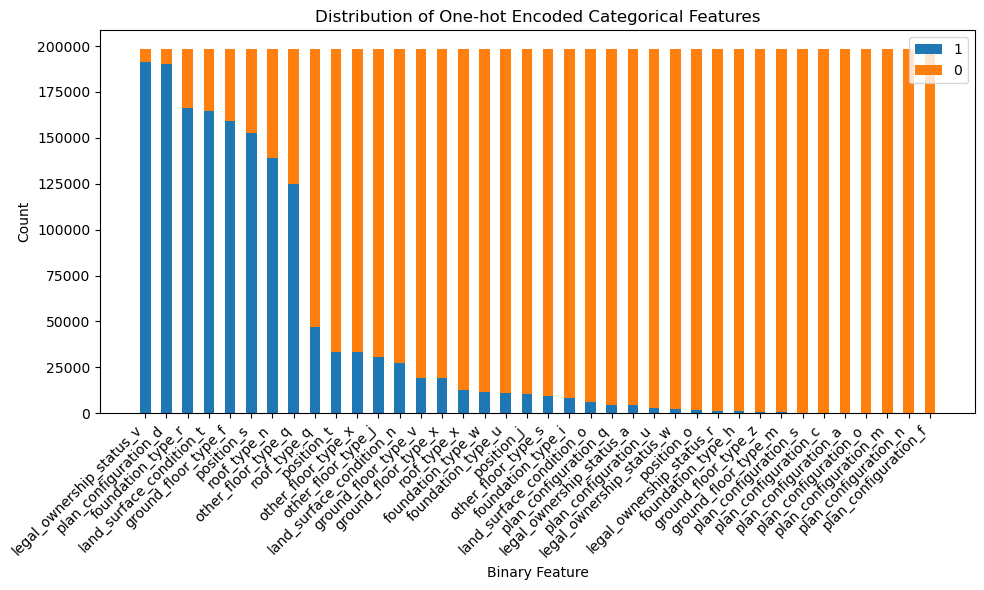

,Feature,Count_0,Count_1,%_0,%_1
0,legal_ownership_status_v,7468,191157,3.76,96.24
1,plan_configuration_d,8305,190320,4.18,95.82
2,foundation_type_r,32332,166293,16.28,83.72
3,land_surface_condition_t,33734,164891,16.98,83.02
4,ground_floor_type_f,39563,159062,19.92,80.08
5,position_s,45720,152905,23.02,76.98
6,roof_type_n,59645,138980,30.03,69.97
7,other_floor_type_q,73586,125039,37.05,62.95
8,roof_type_q,151765,46860,76.41,23.59
9,position_t,165177,33448,83.16,16.84


In [17]:
one_hot_encoded_columns=list(X_train_encoded.columns)
sorted_cols= plot_binary_distribution(one_hot_encoded_columns,X_train_new,"Distribution of One-hot Encoded Categorical Features" )



**Analysis**

The stacked bar chart above illustrates the distribution of the one-hot encoded features. The accompanying table presents the counts of 0’s and 1’s, along with their respective percentages. Among the 38 features, 12 have 1’s in less than 1% of the cases. Consequently, in the subsequent analysis, MCA is computed twice: once including all encoded features, and once excluding the features with less than 1% of 1’s.

In [18]:
# list of the features that has 1's less than 1%
less_imp_cols=['position_o','legal_ownership_status_r','foundation_type_h','ground_floor_type_z','ground_floor_type_m','plan_configuration_s','plan_configuration_c',
'plan_configuration_a', 'plan_configuration_o','plan_configuration_m','plan_configuration_n','plan_configuration_f']
encoded_cols=sorted_cols

# X_train after removing less important columns
X_train_encoded_refined=X_train_encoded.drop(columns=less_imp_cols)


### 5.3 Applying Multiple Correspondence Analysis (MCA)

After one-hot encoding the categorical variables, the dataset becomes high-dimensional because each category is expanded into its own binary column. To address this, we apply Multiple Correspondence Analysis (MCA) a dimensionality reduction technique designed specifically for categorical data. 

We use the prince library to compute the MCA.

Inertia per component: [0.17425393 0.07804017 0.0655915  0.06004479 0.05872327 0.0568327
 0.05624223 0.05581022 0.05418438]
Cumulative explained inertia: [0.17425393 0.2522941  0.3178856  0.3779304  0.43665366 0.49348636
 0.54972859 0.60553881 0.65972319]


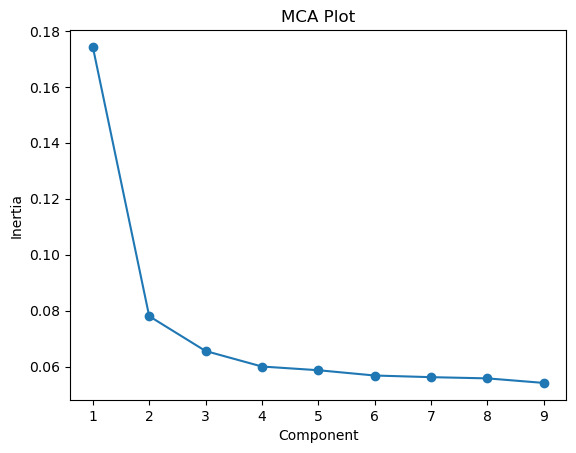

In [19]:
# Function to compute and plot MCA components
def compute_plot_mca(data, n_components, title):
    mca = prince.MCA(
        n_components=n_components,
        n_iter=3,
        copy=True,
        one_hot=False,
        check_input=True,
        engine='sklearn',
        random_state=42
    )
    mca = mca.fit(data)

    # Get eigenvalues and total inertia
    eigvals = mca.eigenvalues_        # array of eigenvalues
    total_inertia = mca.total_inertia_  # total inertia

    # Compute inertia
    explained_inertia = eigvals / total_inertia
    cumulative_inertia = np.cumsum(explained_inertia)

    print("Inertia per component:", explained_inertia)
    print("Cumulative explained inertia:", cumulative_inertia)

    plt.plot(range(1, len(explained_inertia)+1), explained_inertia, marker='o')
    plt.xlabel("Component")
    plt.ylabel("Inertia")
    plt.title(title)
    plt.show()
    return mca

# _ = compute_plot_mca(X_train_encoded,9, "MCA Plot (All Encoded Columns)")
mca= compute_plot_mca(X_train_encoded_refined,9, "MCA Plot")

The two plots above represent the Multiple Correspondence Analysis (MCA) scree plots, showing the proportion of explained inertia (variance) for each component. The first plot was computed using all the one-hot encoded categorical features, while the second plot was generated after removing less informative features. We observe that the highest variation in the data is concentrated in the first 2-3 components while the later one contributes very little additional information. 

We included both plots to illustrate the impact of features on the explained variance. Initially, when all encoded categorical features were used, the first 9 components accounted for only about 39% of the total variance, suggesting that some features contributed little to the overall structure of the data.

To improve the representation of the data and capture more meaningful variance, we removed twelve features that contained mostly zero values (i.e., categories with minimal or no variation). This refinement reduced noise by removing the uninformative features.



In [20]:
#Applying MCA in X_train
mca_components = mca.transform(X_train_encoded_refined)

#remove encoded columns
X_train_encoded_removed=X_train_new.drop(columns=encoded_cols)

# mca, mca_components = compute_plot_mca(X_train_encoded_refined, "MCA Plot")
X_train_final = pd.concat([X_train_encoded_removed, mca_components], axis=1)

print(f"Shape after removing encoded columns and adding MCA components: {X_train_final.shape}")


Shape after removing encoded columns and adding MCA components: (198625, 39)


#### 5.4  Computimg the correlation between Features and the Damage Grade

Our initial analysis confirms that the training and the testing datastes have similar distribution. We use the training dataset for further data analysis 

To assess the correlation among all the features, we generate a correlation matrix plot using a heatmap of Spearman correlations. Given that the target variable is an ordinal category, the Spearman correlation serves the best purpose to show this relationship. We use the one-hot encoding representation of the categorical data to ensure proper statistical analysis. This helped us visually identify any strong or weak correlation that could influence the model training.

None of the variables show a positive or negative correlation greater than 0.3. It may be hard to draw any conclusion regarding the importance of these variable in determining the damage grade. However, we observe that a few features, such as foundation_type_r, superstructure_mortar_stone show moderate positive correlation, which is worth mentioning. 

In [21]:
train_data = X_train_final.copy()
train_data['damage_grade'] = y_train

# plt.figure(figsize=(4, 15))
# heatmap = sns.heatmap(train_data.corr(method='spearman')[['damage_grade']].sort_values(by='damage_grade', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
# heatmap.set_title('Correlation values between Features and Damage Grade', fontdict={'fontsize':18}, pad=16)

In [22]:
binary_col_drop=[
    "has_secondary_use_agriculture", 
    "has_secondary_use_hotel",
    "has_secondary_use_rental",
    "has_secondary_use_institution",
    "has_secondary_use_school",
    "has_secondary_use_industry",
    "has_secondary_use_health_post",
    "has_secondary_use_gov_office",
    "has_secondary_use_use_police",
    "has_secondary_use_other"]
numerical_col_drop=["height_percentage"]
X_train_reduced=X_train_final.copy().drop(columns=binary_col_drop+numerical_col_drop)

print(X_train_final.shape)
print(X_train_reduced.shape)

(198625, 39)
(198625, 28)


# 6. Proposed Protocol

**a. Data Spliting Strategy and Preventing Data Leakage**

The initial dataset is splited into 80% for training and 20% for testing, following the standard Ml procedure. 
From our analysis, we see that the dataset is heavily imbalanced, therefore we chose stratified sampling method. To prevent data leakage and ensure good generalization on unseen data, we carefully design the data-splitting protocol. All preprocessing steps such as encoding categorical variables and applying Multiple Correspondence Analysis (MCA) are performed only on the trainign set after splitting to avoid leakage.

Considering the features are highly imbalanced, we will focus on selecting models that is capable of dealing with this kind of problem and learning from the data efficiently.  The same transformations fitted on the training sets will be applied to the test sets to ensure consistency and to properly evaluate the model’s performance.

**b. Model Training**

Looking at the data, we make an assumption that features (numerical: families_count, distribution of geolevel-2, distribution of geolevel-3, categorical: plan, position_configuration, legal_ownership_staus) has no direct relation to the Eathquake building damage classification problem. We verify this based on feature correlation with target variables heatmap. We will train two versions of the model: one excluding these features and another including them, to assess their impact on model performance and evaluation.

In addition to this, the binary features with the count of 1's less than 1% of the data, will also be examined.  Such features will be excluded if they show minimal contribution after model training.

**c. Hyperparameters Tuning**

For hyperparameter tuning, only the training data will be used—either by splitting it into training and validation subsets or by applying stratified k-fold cross-validation, depending on the model. The choice of tuning strategy will be made after selecting the model, as it depends on the number and complexity of parameters to be optimized.

**d. Evaluation metric**

Since our task involves multi-class classification, we will use the macro F1 score as the primary evaluation metrics. The macro F1 score calculates the F1 score independently for each class and then takes the unweighted average, thus giving equal importance to all classes, regardless of their frequency in the dataset. This makes it particularly suitable for imbalanced datasets, where some classes may be underrepresented.

In addition to the macro F1 score, we will also report the F1 score for each individual class. This will provide a more detailed view of the model’s performance across different categories and help identify specific classes where the model may be underperforming.


In [ ]:
# X_train_final, y_train
# X_train_reduced, y_train
# X_test, y_test

### Dummy Classifier

### Random Forest

### XGBoost